In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
train_path='Dataset/Train.csv'
test_path='Dataset/Test.csv'

In [62]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [63]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [64]:
len(list(train.keys()))

9

In [65]:
list(train.keys())

['Item_Id',
 'Date',
 'State_of_Country',
 'Market_Category',
 'Product_Category',
 'Grade',
 'Demand',
 'Low_Cap_Price',
 'High_Cap_Price']

#### Step 1 : Pre-processing Steps

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 9 columns):
Item_Id             9798 non-null object
Date                9798 non-null object
State_of_Country    9798 non-null int64
Market_Category     9798 non-null int64
Product_Category    9798 non-null int64
Grade               9798 non-null int64
Demand              9798 non-null float64
Low_Cap_Price       9798 non-null int64
High_Cap_Price      9798 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 689.0+ KB


In [67]:
train.isna().sum()

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Low_Cap_Price       0
High_Cap_Price      0
dtype: int64

#### No Empty Cell

In [68]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


##### Drop Item_Id from training and testing

In [69]:
train=train.drop('Item_Id',axis=1)
Item_test=test['Item_Id']
test=test.drop('Item_Id',axis=1)

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 8 columns):
Date                9798 non-null object
State_of_Country    9798 non-null int64
Market_Category     9798 non-null int64
Product_Category    9798 non-null int64
Grade               9798 non-null int64
Demand              9798 non-null float64
Low_Cap_Price       9798 non-null int64
High_Cap_Price      9798 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 612.5+ KB


##### How to handle date:
* %Y-%m-%d -----> struture with attributes (by time.strptime())
* Structure with attributes -----> time(passed in seconds) since 1 JAN, 1970 (by time.mktime())

In [71]:
import time
print(train['Date'].head())
print(type(train['Date'][0]))

0    2007-07-05
1    2007-07-05
2    2007-07-05
3    2007-07-05
4    2007-07-05
Name: Date, dtype: object
<class 'str'>


In [72]:
def format_time(data):
    object_time = time.strptime(data, "%Y-%m-%d")
    return int(format(time.mktime(object_time),'.0f'))

In [73]:
train['format_date'] = pd.Series(map(format_time,train['Date']))

In [74]:
test['format_date'] = pd.Series(map(format_time,test['Date']))

In [75]:
type(train['Date'])

pandas.core.series.Series

In [76]:
train.head()

,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,format_date
0,2007-07-05,0,0,0,0,0.5,2785,4240,1183573800
1,2007-07-05,0,1,0,0,0.7,3574,4756,1183573800
2,2007-07-05,0,103,0,1,1.6,5978,9669,1183573800
3,2007-07-05,0,103,0,0,0.0,5681,8313,1183573800
4,2007-07-05,0,103,0,2,0.0,4924,7257,1183573800


In [77]:
test.head()

,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price,format_date
0,2014-01-19,0,3,0,0,0.1,5303,1390069800
1,2014-01-19,0,268,0,2,1.4,10492,1390069800
2,2014-01-19,0,320,0,0,13.4,24706,1390069800
3,2014-01-19,17,358,0,3,5.5,23464,1390069800
4,2014-01-19,18,23,5,2,0.0,6222,1390069800


In [78]:
train=train.drop('Date',axis=1)
test=test.drop('Date',axis=1)

In [79]:
list(train.keys())

['State_of_Country',
 'Market_Category',
 'Product_Category',
 'Grade',
 'Demand',
 'Low_Cap_Price',
 'High_Cap_Price',
 'format_date']

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 8 columns):
State_of_Country    9798 non-null int64
Market_Category     9798 non-null int64
Product_Category    9798 non-null int64
Grade               9798 non-null int64
Demand              9798 non-null float64
Low_Cap_Price       9798 non-null int64
High_Cap_Price      9798 non-null int64
format_date         9798 non-null int64
dtypes: float64(1), int64(7)
memory usage: 612.5 KB


##### Check for Categorical Features

In [82]:
def check_categorical_features(data):
    temp=[]
    for i in list(data):
        if i not in temp or len(temp)==0:
            temp.append(i)
    return len(temp)<20

In [88]:
print("Check of Categorical Features",end='\n\n')
print("State_of_Country  ----> ",check_categorical_features(train['State_of_Country']))
print("Market_Category   ----> ",check_categorical_features(train['Market_Category']))
print("Product_Category  ----> ",check_categorical_features(train['Product_Category']))
print("Grade             ----> ",check_categorical_features(train['Grade']))
print("Demand            ----> ",check_categorical_features(train['Demand']))
print("Low_Cap_price     ----> ",check_categorical_features(train['Low_Cap_Price']))
print("High_Cap_Price    ----> ",check_categorical_features(train['High_Cap_Price']))
print("Format_date       ----> ",check_categorical_features(train['format_date']))

Check of Categorical Features

State_of_Country  ---->  False
Market_Category   ---->  False
Product_Category  ---->  True
Grade             ---->  True
Demand            ---->  False
Low_Cap_price     ---->  False
High_Cap_Price    ---->  False
Format_date       ---->  False


In [89]:
train['Product_Category'].value_counts()

0     7167
10    1050
1      524
13     408
12     204
15     168
16      79
11      62
14      43
7       30
5       23
6       18
3        9
4        5
17       4
9        2
8        2
Name: Product_Category, dtype: int64

In [90]:
train['Grade'].value_counts()

0    6715
2    1698
3     804
1     581
Name: Grade, dtype: int64

#### No Need for in one-hot encoding or other transformation

### Step2 : Statistical Analysis

In [94]:
pd.options.display.float_format = '{:,.2f}'.format
train.describe().T

,count,mean,std,min,25%,50%,75%,max
State_of_Country,"9,798.00",14.28,8.76,0.00,3.00,20.00,21.00,23.00
Market_Category,"9,798.00",198.41,169.77,0.00,55.00,129.00,389.00,471.00
Product_Category,"9,798.00",2.49,4.75,0.00,0.00,0.00,1.00,17.00
Grade,"9,798.00",0.65,1.03,0.00,0.00,0.00,2.00,3.00
Demand,"9,798.00",71.98,927.19,0.00,0.50,2.00,10.17,"64,160.50"
Low_Cap_Price,"9,798.00","3,500.27","2,188.05",1.00,"1,863.25","3,124.00","4,667.50","17,580.00"
High_Cap_Price,"9,798.00","6,349.84","3,652.78",163.00,"3,878.25","5,552.50","7,993.75","58,812.00"
format_date,"9,798.00","1,222,862,052.79","26,861,078.20","1,183,573,800.00","1,201,717,800.00","1,217,788,200.00","1,244,485,800.00","1,276,021,800.00"


In [95]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation between features')

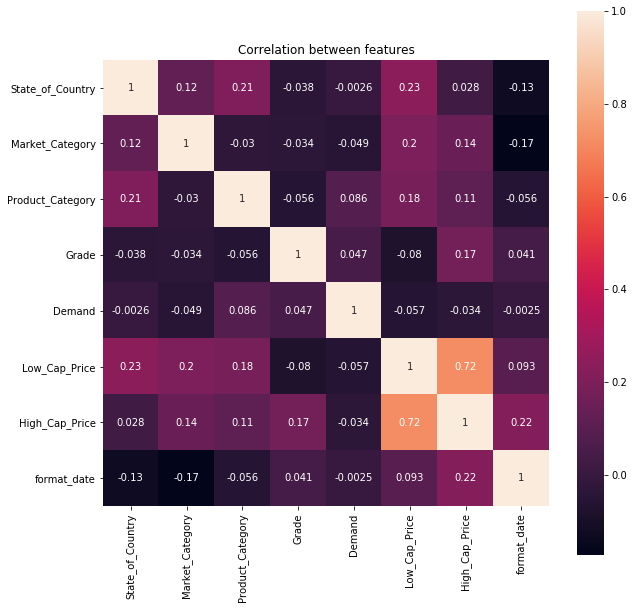

In [96]:
plt.figure(figsize=(10,10))
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

In [97]:
train['format_date']=(train['format_date']-train['format_date'].mean())/(train['format_date'].max()-train['format_date'].min())

Text(0.5, 1.0, 'Correlation between features')

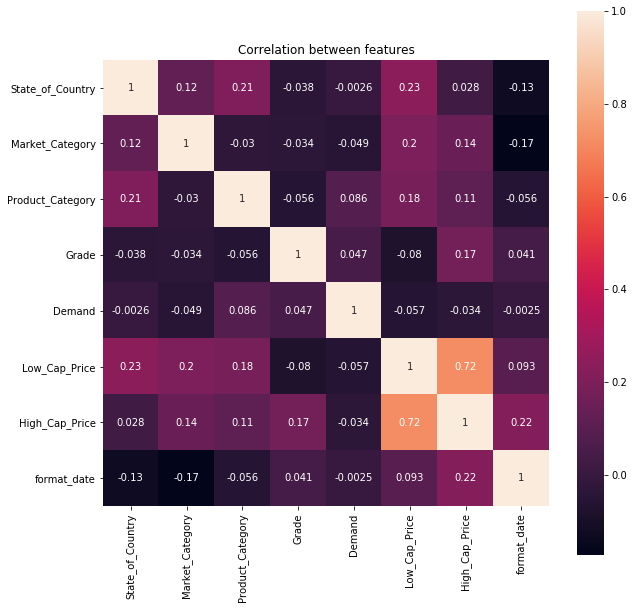

In [98]:
plt.figure(figsize=(10,10))
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

In [99]:
train['format_date'].head()

0   -0.42
1   -0.42
2   -0.42
3   -0.42
4   -0.42
Name: format_date, dtype: float64

##### Step-3 :Feature Selection
 * Train with All feature and observe result on validation data
 * Train with All feature except format_date and observe result on validation data
 * Train with four best features(State_of_country,mArket_Category,Product_Category,High_Cap_price) and observe result on validation data


In [103]:
train_label = train['Low_Cap_Price']
train_data = train.drop('Low_Cap_Price',axis=1)

In [104]:
train_data.head()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price,format_date
0,0,0,0,0,0.50,4240,-0.42
1,0,1,0,0,0.70,4756,-0.42
2,0,103,0,1,1.60,9669,-0.42
3,0,103,0,0,0.00,8313,-0.42
4,0,103,0,2,0.00,7257,-0.42


In [149]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [150]:
train_x,validation_x,train_y,validation_y = train_test_split(train_data,train_label,test_size=0.28,random_state=0) 

In [151]:
print("length of train data : ", len(train_x))
print("length of validation data : ", len(validation_x))

length of train data :  7054
length of validation data :  2744


#### Performance Criteria

In [152]:
import math

In [172]:
def performance(actual,predict):
    return max(0,(100-mean_squared_log_error(validation_y, predict_y)))

##### Linear Regression Baseline

In [155]:
model1 = LinearRegression()

In [156]:
model1.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [157]:
predict_y = model1.predict(validation_x)

In [158]:
type(predict_y)

numpy.ndarray

In [159]:
predict_y

array([4575.45534358, 3116.34884821, 2630.59804924, ..., 2460.58434641,
       1450.59698823, 4921.26692805])

In [160]:
predict = predict_y+1

In [167]:
predict_y[predict_y<0]=0.0

In [168]:
valid = np.array(validation_y.tolist())+1

In [169]:
valid

array([4986, 4007,  990, ..., 3110, 1663, 3696])

In [170]:
valid[valid<0]

array([], dtype=int32)

In [171]:
mean_squared_log_error(validation_y, predict_y)

0.43538502607924673

In [173]:
performance(validation_y,predict_y)

99.56461497392075

##### SVR Baseline Model

In [174]:
model2 = svm.SVR()
model2.fit(train_x,train_y)

C:\Users\alsrivas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [175]:
predict_svr = model2.predict(validation_x)

In [176]:
predict_svr[predict_svr<0]=0.0

In [177]:
performance(validation_y,predict_svr)

99.56461497392075

##### Ridge Regression Baseline: 

In [179]:
from sklearn.linear_model import Ridge

In [180]:
model3 = Ridge()

In [181]:
model3.fit(train_x,train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [182]:
predict_ridge = model3.predict(validation_x)
performance(validation_y,predict_ridge)

99.56461497392075

##### Lasso Model Baseline

In [183]:
from sklearn.linear_model import Lasso

In [184]:
model4 = Lasso()

In [185]:
model4.fit(train_x,train_y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [186]:
predict_lasso = model4.predict(validation_x)

In [187]:
performance(validation_y,predict_lasso)

99.56461497392075

#### MLP Model Baseline

In [189]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [252]:
def get_model(input_shape):
    model = Sequential([Dense(64,activation='relu',input_shape=(input_shape,)),
                        Dense(64,activation='relu'),
                        Dense(64,activation='relu'),
                        Dense(64,activation='relu'),
                        Dense(64,activation='relu'),
                        Dense(16,activation='relu'),
                        Dense(16,activation='relu'),
                        Dense(16,activation='relu'),
                        Dense(16,activation='relu'),
                        Dense(16,activation='relu'),
                        Dense(1)
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='mean_squared_logarithmic_error')
    return model

In [253]:
train_x.shape

(7054, 7)

In [254]:
model5 = get_model(train_x.shape[1])

In [255]:
x=3
x

3

In [256]:
history = model5.fit(train_x,train_y,epochs=100)

Train on 7054 samples
Epoch 1/100
7054/7054 [==============================] - 2s 246us/sample - loss: 0.3918
Epoch 2/100
7054/7054 [==============================] - 1s 125us/sample - loss: 0.2140
Epoch 3/100
7054/7054 [==============================] - 1s 117us/sample - loss: 0.2079
Epoch 4/100
7054/7054 [==============================] - 1s 119us/sample - loss: 0.2001
Epoch 5/100
7054/7054 [==============================] - 1s 121us/sample - loss: 0.1962
Epoch 6/100
7054/7054 [==============================] - 1s 123us/sample - loss: 0.2018
Epoch 7/100
7054/7054 [==============================] - 1s 124us/sample - loss: 0.1937
Epoch 8/100
7054/7054 [==============================] - 1s 123us/sample - loss: 0.1908
Epoch 9/100
7054/7054 [==============================] - 1s 121us/sample - loss: 0.1841
Epoch 10/100
7054/7054 [==============================] - 1s 137us/sample - loss: 0.1785
Epoch 11/100
7054/7054 [==============================] - 1s 131us/sample - loss: 0.1812
Epoch 12

Epoch 93/100
7054/7054 [==============================] - 1s 122us/sample - loss: 0.1410
Epoch 94/100
7054/7054 [==============================] - 1s 122us/sample - loss: 0.1439
Epoch 95/100
7054/7054 [==============================] - 1s 121us/sample - loss: 0.1450
Epoch 96/100
7054/7054 [==============================] - 1s 127us/sample - loss: 0.1420
Epoch 97/100
7054/7054 [==============================] - 1s 127us/sample - loss: 0.1492
Epoch 98/100
7054/7054 [==============================] - 1s 123us/sample - loss: 0.1458
Epoch 99/100
7054/7054 [==============================] - 1s 131us/sample - loss: 0.1423
Epoch 100/100
7054/7054 [==============================] - 1s 120us/sample - loss: 0.1473


In [257]:
predict_mlp = model5.predict(validation_x)

In [258]:
performance(validation_y,predict_mlp)

99.56461497392075

##### Train the MLP with FUll training data and monitor the validation performance

In [259]:
model_full = get_model(train_data.shape[1])

In [260]:
history = model_full.fit(train_data,
                         train_label,
                         epochs=1000,
                         validation_split=0.25,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=8,mode='min'),
                                    tf.keras.callbacks.ModelCheckpoint(filepath='Weight_best/checkpoint',
                                                                       save_weights_only=True,
                                                                       save_freq='epoch',
                                                                       monitor='val_loss',
                                                                       save_best_only=True,
                                                                       verbose=1)])

Train on 7348 samples, validate on 2450 samples
Epoch 1/1000
7072/7348 [===========================>..] - ETA: 0s - loss: 0.6308
Epoch 00001: val_loss improved from inf to 0.33178, saving model to Weight_best/checkpoint
7348/7348 [==============================] - 2s 297us/sample - loss: 0.6133 - val_loss: 0.3318
Epoch 2/1000
6912/7348 [===========================>..] - ETA: 0s - loss: 0.1793
Epoch 00002: val_loss improved from 0.33178 to 0.31331, saving model to Weight_best/checkpoint
7348/7348 [==============================] - 1s 150us/sample - loss: 0.1782 - val_loss: 0.3133
Epoch 3/1000
7296/7348 [============================>.] - ETA: 0s - loss: 0.1739
Epoch 00003: val_loss did not improve from 0.31331
7348/7348 [==============================] - 1s 151us/sample - loss: 0.1732 - val_loss: 0.3191
Epoch 4/1000
7136/7348 [============================>.] - ETA: 0s - loss: 0.1725
Epoch 00004: val_loss did not improve from 0.31331
7348/7348 [==============================] - 1s 137us/s

6976/7348 [===========================>..] - ETA: 0s - loss: 0.1526
Epoch 00034: val_loss did not improve from 0.25903
7348/7348 [==============================] - 1s 148us/sample - loss: 0.1527 - val_loss: 0.2635
Epoch 35/1000
7040/7348 [===========================>..] - ETA: 0s - loss: 0.1420
Epoch 00035: val_loss did not improve from 0.25903
7348/7348 [==============================] - 1s 144us/sample - loss: 0.1406 - val_loss: 0.2838
Epoch 36/1000
7008/7348 [===========================>..] - ETA: 0s - loss: 0.1380
Epoch 00036: val_loss did not improve from 0.25903
7348/7348 [==============================] - 1s 138us/sample - loss: 0.1376 - val_loss: 0.2816
Epoch 37/1000
7200/7348 [============================>.] - ETA: 0s - loss: 0.1350
Epoch 00037: val_loss improved from 0.25903 to 0.25401, saving model to Weight_best/checkpoint
7348/7348 [==============================] - 1s 152us/sample - loss: 0.1352 - val_loss: 0.2540
Epoch 38/1000
7072/7348 [===========================>..] -

In [261]:
predict_mlp2=model_full.predict(validation_x)

In [262]:
peformance(validation_y,predict_mlp2)

array([99.83331], dtype=float32)

In [263]:
train_data.head()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price,format_date
0,0,0,0,0,0.50,4240,-0.42
1,0,1,0,0,0.70,4756,-0.42
2,0,103,0,1,1.60,9669,-0.42
3,0,103,0,0,0.00,8313,-0.42
4,0,103,0,2,0.00,7257,-0.42


In [265]:
test.head()
test['format_date']=(test['format_date']-test['format_date'].mean())/(test['format_date'].max()-test['format_date'].min())
test.head()                                                                      

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price,format_date
0,0,3,0,0,0.10,5303,-0.51
1,0,268,0,2,1.40,10492,-0.51
2,0,320,0,0,13.40,24706,-0.51
3,17,358,0,3,5.50,23464,-0.51
4,18,23,5,2,0.00,6222,-0.51


In [266]:
model_mlp_final = get_model(test.shape[1])

In [267]:
model_mlp_final.load_weights(tf.train.latest_checkpoint('Weight_best'))

In [268]:
result = model_mlp_final.predict(test)

In [270]:
test.shape[0]

5763

In [273]:
final_data=[]
for i in result:
    if i-int(i)-0.5>=0.1:
        final_data.append(math.ceil(i))
    else:
        final_data.append(math.floor(i))

In [274]:
import csv
with open('submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Item_Id", "Low_Cap_Price"])
    for i in range(test.shape[0]):
        writer.writerow([Item_test[i],final_data[i]])